## Step 4: Data Wrangling

Start off by connecting to the database (as above), import pandas as pd, and then load back your DataFrames: airlines, airports, routes and incidents (not counting flights, which will take forever to load) from SQL, using the syntax:

```
    dataframe = pd.read_sql_query('select * from table_name', engine)
```

In [96]:
import sqlite3
import pandas as pd

engine = sqlite3.connect('HW1_DB')

# TODO: Re-load dataframes from SQL

# YOUR CODE HERE
airlines_df = pd.read_sql_query('select * from airlines', engine)
airports_df = pd.read_sql_query('select * from airports', engine)
routes_df = pd.read_sql_query('select * from routes', engine)
incidents_df = pd.read_sql_query('select * from incidents', engine)

In [97]:
if 'index' in airlines_df.columns:
    raise ValueError('SQL added an index column -- shouldn''t have that plus the Pandas index')
    
if 'index' in airports_df.columns:
    raise ValueError('SQL added an index column -- shouldn''t have that plus the Pandas index')

if 'index' in routes_df.columns:
    raise ValueError('SQL added an index column -- shouldn''t have that plus the Pandas index')

if 'index' in incidents_df.columns:
    raise ValueError('SQL added an index column -- shouldn''t have that plus the Pandas index')

## Step 4.1: Understanding our data

Take a look at the details of our dataframes...

In [98]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 8 columns):
airline_id          6048 non-null int64
airline_name        6048 non-null object
airline_alias       6048 non-null object
airline_iata        6048 non-null object
airline_icao        6048 non-null object
airline_callsign    6048 non-null object
country             6048 non-null object
active              6048 non-null object
dtypes: int64(1), object(7)
memory usage: 378.1+ KB


In [99]:
airlines_df

,airline_id,airline_name,airline_alias,airline_iata,airline_icao,airline_callsign,country,active
0,1,Private flight,,-,,,,Y
1,2,135 Airways,,,GNL,GENERAL,United States,N
2,3,1Time Airline,,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,,,WYT,,United Kingdom,N
4,5,213 Flight Unit,,,TFU,,Russia,N
5,6,223 Flight Unit State Airline,,,CHD,CHKALOVSK-AVIA,Russia,N
6,7,224th Flight Unit,,,TTF,CARGO UNIT,Russia,N
7,8,247 Jet Ltd,,,TWF,CLOUD RUNNER,United Kingdom,N
8,9,3D Aviation,,,SEC,SECUREX,United States,N
9,10,40-Mile Air,,Q5,MLA,MILE-AIR,United States,Y


In [100]:
airlines_df.describe()

,airline_id
count,6048.000000
mean,3844.729167
std,3945.495487
min,-1.000000
25%,1512.750000
50%,3025.500000
75%,4543.250000
max,19845.000000


In [101]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
airport_id      8107 non-null int64
airport_name    8107 non-null object
city            8107 non-null object
country         8107 non-null object
iata            8107 non-null object
icao            8107 non-null object
lat             8107 non-null float64
lon             8107 non-null float64
alt             8107 non-null int64
timezone        8107 non-null float64
dst             8107 non-null object
tz              8107 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 760.1+ KB


In [102]:
airports_df

,airport_id,airport_name,city,country,iata,icao,lat,lon,alt,timezone,dst,tz
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby
5,6,Wewak Intl,Wewak,Papua New Guinea,WWK,AYWK,-3.583828,143.669186,19,10.0,U,Pacific/Port_Moresby
6,7,Narsarsuaq,Narssarssuaq,Greenland,UAK,BGBW,61.160517,-45.425978,112,-3.0,E,America/Godthab
7,8,Nuuk,Godthaab,Greenland,GOH,BGGH,64.190922,-51.678064,283,-3.0,E,America/Godthab
8,9,Sondre Stromfjord,Sondrestrom,Greenland,SFJ,BGSF,67.016969,-50.689325,165,-3.0,E,America/Godthab
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531203,-68.703161,251,-4.0,E,America/Thule


In [103]:
airports_df.describe()

,airport_id,lat,lon,alt,timezone
count,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000
mean,4766.361046,26.817720,-3.921969,933.449365,0.169236
std,2943.205193,27.866953,85.900873,1624.740899,5.737326
min,1.000000,-89.999997,-179.877000,-1266.000000,-12.000000
25%,2091.500000,8.824928,-79.022498,38.000000,-5.000000
50%,4257.000000,34.987800,5.292028,272.000000,1.000000
75%,7508.500000,47.957599,49.785821,1020.000000,4.000000
max,9541.000000,82.517778,179.951000,14472.000000,13.000000


In [104]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66548 entries, 0 to 66547
Data columns (total 9 columns):
airline_iata        66548 non-null object
airline_id          66548 non-null int64
src_iata_icao       66548 non-null object
source_id           66548 non-null int64
target_iata_icao    66548 non-null object
target_id           66548 non-null int64
code_share          66548 non-null object
stops               66548 non-null int64
equipment           66548 non-null object
dtypes: int64(4), object(5)
memory usage: 4.6+ MB


In [105]:
routes_df

,airline_iata,airline_id,src_iata_icao,source_id,target_iata_icao,target_id,code_share,stops,equipment
0,2B,410,AER,2965,KZN,2990,,0,CR2
1,2B,410,ASF,2966,KZN,2990,,0,CR2
2,2B,410,ASF,2966,MRV,2962,,0,CR2
3,2B,410,CEK,2968,KZN,2990,,0,CR2
4,2B,410,CEK,2968,OVB,4078,,0,CR2
5,2B,410,DME,4029,KZN,2990,,0,CR2
6,2B,410,DME,4029,NBC,6969,,0,CR2
7,2B,410,DME,4029,UUA,6160,,0,CR2
8,2B,410,EGO,6156,KGD,2952,,0,CR2
9,2B,410,EGO,6156,KZN,2990,,0,CR2


In [106]:
routes_df.describe()

,airline_id,source_id,target_id,stops
count,66548.000000,66548.000000,66548.000000,66548.000000
mean,3367.569754,2660.201929,2662.088192,0.000165
std,3182.024330,1577.965637,1578.661433,0.012856
min,10.000000,1.000000,1.000000,0.000000
25%,1317.000000,1382.000000,1382.000000,0.000000
50%,2942.000000,2958.000000,2958.000000,0.000000
75%,4608.000000,3670.000000,3670.000000,0.000000
max,19676.000000,9327.000000,9327.000000,1.000000


In [107]:
incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 3 columns):
Date         322 non-null object
Airline      322 non-null object
FlightNum    322 non-null object
dtypes: object(3)
memory usage: 7.6+ KB


In [108]:
incidents_df

,Date,Airline,FlightNum
0,1997-01-09 00:00:00,Comair,3272
1,1997-03-18 00:00:00,Stavropolskaya Aktsionernaya Avia,1023
2,1997-04-19 00:00:00,Merpati Nusantara Airlines,106
3,1997-05-08 00:00:00,China Southern Airlines,3456
4,1997-07-31 00:00:00,FedEx Express,14
5,1997-07-17 00:00:00,Sempati Air,304
6,1997-08-06 00:00:00,Korean Air,801
7,1997-08-10 00:00:00,Formosa Airlines,7601
8,1997-09-03 00:00:00,Vietnam Airlines,815
9,1997-09-06 00:00:00,Royal Brunei Airlines,238


In [109]:
incidents_df.describe()

,Date,Airline,FlightNum
count,322,322,322
unique,309,237,302
top,2001-09-11 00:00:00,American Airlines,120
freq,4,7,3



We would expect certain characteristics, such as every airport to have flights, and every airport to be a source and a destination. (Otherwise we’d have a situation where some airports pile up airplanes, and others have no planes!)

Take a look at our data and compute:
* How many airports are origins in a route?
* How many airports are destinations in a route?
* How many cities are in the list of airports?


Output these in a dictionary called results with three keys: {'airports’: _, 'destinations': _, 'sources’: _}

In [110]:
# YOUR CODE HERE
nOrigins = len(routes_df['source_id'].unique()) # number of origin airports
nDests = len(routes_df['target_id'].unique()) # number of destination airports
nCities = len(airports_df['city'].unique()) # number of cities in airport list

In [111]:
# TODO: output dictionary results {‘airports’: ___, ‘destinations’: ___, ‘sources’: ___}

# YOUR CODE HERE
results = {
  "airports": nCities,
  "destinations": nDests,
  "origins": nOrigins
}

In [112]:
if 'origins' not in results:
    raise KeyError('Missing key ''origins'' from dictionary')
    
if 'destinations' not in results:
    raise KeyError('Missing key ''origins'' from dictionary')

if 'airports' not in results:
    raise KeyError('Missing key ''origins'' from dictionary')


# 4.2 Looking at Joint Data

Now let's combine information from the different sources!

## Step 4.2.1 Combining DataFrames via Merge (also known as Join)

The first question is which airports are in the data as destinations, but not as sources.  Set the variable `flyable_df` to a dataframe containing the number of airports you can fly to, but not from.  Be sure to eliminate duplicates.

You’ll need to do a merge (join) with the original `airports_df` DataFrame.  Note that `dataframe.merge()` can be called with a second DataFrame, as well as the columns to match (`left_on`, `right_on`).

In [113]:
# TODO: Compute airports you can fly to by not from, in the variable flyable_df

# YOUR CODE HERE
sources = routes_df['source_id'].to_frame()
destinations = routes_df['target_id'].to_frame()
flights = sources.merge(destinations,left_on='source_id',right_on='target_id',how='right')
ind = pd.isnull(flights['source_id']) # find rows where there is only destination ID (source ID = NaN)
flyable_df = flights['target_id']
flyable_df = flyable_df[ind].to_frame().drop_duplicates()

flyable_df = flyable_df.merge(airports_df, left_on='target_id', right_on='airport_id')
# flyable_df = flyable_df[['airport_name']]

In [114]:
if not type(flyable_df) is pd.DataFrame:
    raise ValueError("wrong variable type")

if not 'airport_name' in flyable_df.columns:
    raise ValueError("wrong field name")
    

In [115]:
### BEGIN HIDDEN TESTs
if sum(list(flyable_df['airport_name'] == 'Punta Gorda Airport')) != 1:
    raise ValueError("You probably lost an airport")

if sum(list(flyable_df['airport_name'] == 'El Porvenir')) != 1:
    raise ValueError("You probably lost an airport")

## Step 4.2.2: Top-k Destinations

Next let’s consider what destination airports are most-trafficked, by the airport's **city name**.  Recall that we have the frequencies of arrivals for each airport by its ID. You may also find the `.reset_index()` method useful.

Collect the top-k elements into a dataframe called `topk`, with the city and count.

In [116]:
#TODO: top 10 most popular airports

# YOUR CODE HERE
topk = routes_df['target_id'].value_counts().rename_axis('airport_id').reset_index(name='count')[0:10] # rename column used as index as 'airport_id', create column of number of values of each target_id named "count", & select first 10
topk = topk.merge(airports_df, left_on='airport_id', right_on='airport_id') # merge based on 'airport_id' to get additional info

topk = topk[['city','count']]

In [117]:
if len(topk) != 10:
    raise ValueError("unexpected number of entries")


## Step 4.3: Visualizing the Data

Let’s try to find out how “reliable” an airline is by comparing the number of flight routes it has and the number of incidents it has had in the last 20 years.


In [136]:
# TODO: Create dataframe of airline_iata, number of incidents, number of routes

# YOUR CODE HERE
# === calculate number of incidents & keep airlines with > 2 incidents ===
pd.set_option('mode.chained_assignment', None) # turn off warning for SettingWithCopy
inc = incidents_df['Airline'].value_counts().rename_axis('airline').reset_index(name='incident_count')
inc = inc[inc['incident_count'] > 2] # keep airlines with more than 2 incidents
inc['airline'][inc['airline']=='Air Algérie'] = 'Air Algerie' # replace accented letters
inc['airline'][inc['airline']=='Aviación'] = 'Aviacion'
inc['airline_lower'] = inc['airline'].str.lower() # use lower case to match airline names across tables (for handling cases like "EgyptAir"/"Egyptair")
airlines_df['airline_name_lower'] = airlines_df['airline_name'].str.lower()
inc_merged = inc.merge(airlines_df, left_on='airline_lower', right_on='airline_name_lower')

# === calculate number of routes ===
merged_df = routes_df.merge(airlines_df, left_on='airline_iata', right_on='airline_iata')
nRoutes = merged_df['airline_iata'].value_counts().rename_axis('airline_iata').reset_index(name='flight_count')

# === merge everything together ===
merged_df = inc_merged.merge(nRoutes, left_on='airline_iata', right_on='airline_iata')
merged_df

# === remove lowercase col's ===
del airlines_df['airline_name_lower']

merged_df[['airline_iata','flight_count','airline','incident_count']]

,airline_iata,flight_count,airline,incident_count
0,AA,2354,American Airlines,7
1,TK,652,Turkish Airlines,6
2,WN,1146,Southwest Airlines,5
3,MS,205,EgyptAir,5
4,QF,430,Qantas,5
5,AF,1071,Air France,5
6,CI,172,China Airlines,4
7,BA,549,British Airways,4
8,UA,2180,United Airlines,3
9,AH,228,Air Algerie,3


In [137]:
if len(merged_df) != 12:
    raise ValueError("unexpected number of entries")


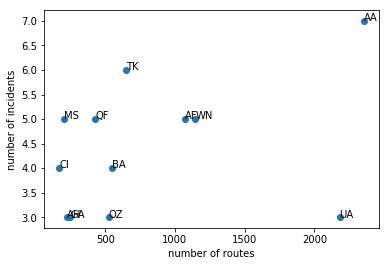

In [138]:
# TODO: Scatter plot of number of routes vs. number of incidents
# ! pip install matplotlib --user
%matplotlib inline

import matplotlib.pyplot as plt

# YOUR CODE HERE
x = merged_df['flight_count']   # number of routes
y = merged_df['incident_count'] # number of incidents
plt.scatter(x, y)
plt.xlabel('number of routes')
plt.ylabel('number of incidents')
s = merged_df['airline_iata']
for label in range(0,len(s)):
    plt.text(x[label], y[label], s[label])

# Step 5: Integrating Data

Data wrangling typically refers to the process of importing, remapping, and converting data.  On the other hand, data integration typically refers to linking data across heterogeneous sources.  We have an integration problem (in its simplest form) when we want to combine the on-time information (what was originally `flights_df`, and is now in the SQL database) and the route information (`routes_df`).

## 5.1 Relating Routes and Flights: Schema Matching
Now we’ll make use of the on-time flight performance table…  Recall that we put this into an SQL table.

Re-read the flight information into `flights_df`.

Now let’s see if we can actually detect what fields (columns) “match” between `routes_df` and `flights_df` DataFrames.  

To do this, let’s note that we only care about the “categorical” (string-valued) columns.  What we want is, e.g., to find fields that have lots of common values (for instance, airline abbreviations or airport codes).  To measure this in a principled way, we’ll use a measure called the Jaccard distance (or Jaccard index or Jaccard measure).  The Jaccard distance measures similarity between two sets A and B, and is merely:

\begin{equation*}
| A \cap B | / |A \cup B|
\end{equation*}

Let’s compute the Jaccard distances between (the values of) all pairs of attributes in `routes_df` and `flights_df`. This will tell us which attributes include similar values - and thus which might represent the same concept. 

In [139]:
# TODO: get flights from SQL

# YOUR CODE HERE
flights_df = pd.read_sql_query('select * from flights', engine)

flights_df

,YEAR,MONTH,DAY_OF_MONTH,CARRIER,FL_NUM,ORIGIN,DEST,ARR_DELAY_NEW,CANCELLED
0,2018,1,2,WN,1325,SJU,MCO,0.0,0.0
1,2018,1,2,WN,5159,SJU,MCO,0.0,0.0
2,2018,1,2,WN,5890,SJU,MCO,9.0,0.0
3,2018,1,2,WN,6618,SJU,MCO,0.0,0.0
4,2018,1,2,WN,1701,SJU,MDW,8.0,0.0
5,2018,1,2,WN,844,SJU,TPA,23.0,0.0
6,2018,1,2,WN,4679,SJU,TPA,0.0,0.0
7,2018,1,2,WN,6294,SLC,BUR,20.0,0.0
8,2018,1,2,WN,5245,SLC,DAL,0.0,0.0
9,2018,1,2,WN,2278,SLC,DEN,0.0,0.0


In [140]:
if len(flights_df) != 570118:
    raise ValueError('Expected a different number of flights')
    
if len(flights_df.columns) != 9:
    raise ValueError('Perhaps you forgot to remove a column? Number of columns isn''t as expected')
    

In [141]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570118 entries, 0 to 570117
Data columns (total 9 columns):
YEAR             570118 non-null int64
MONTH            570118 non-null int64
DAY_OF_MONTH     570118 non-null int64
CARRIER          570118 non-null object
FL_NUM           570118 non-null int64
ORIGIN           570118 non-null object
DEST             570118 non-null object
ARR_DELAY_NEW    551498 non-null float64
CANCELLED        570118 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 39.1+ MB


## Step 5.1: Column / Schema Matches

Create a Cell with an algorithm that iterates over all `routes_df` keys (columns) and all `flights_df` keys.  In a nested map {r → {p → distance}}, the algorithm should store the Jaccard distance between the values in routes column r to the values in performance column p (for distances that are non-zero and only for non-numeric columns).  Remember, since there may be duplicates, you’ll need to convert columns into sets of unique values through `drop_duplicates()`.  


In [142]:
# TODO: create nested map of Jaccard distance

best_match = {}

# YOUR CODE HERE

def jaccard_sim(col_1, col_2):
    intersection = col_1.intersection(col_2)
    union = col_1.union(col_2)
    jaccard = len(intersection)/float(len(union))
    return jaccard

for r in range(0,len(routes_df.columns)):
    if routes_df[routes_df.columns[r]].dtype == 'O': # only for non-numeric col's
        best_match[routes_df.columns[r]] = {} # initialize nested dictionary
        route_data = routes_df[routes_df.columns[r]].drop_duplicates() # convert to set of unique values
        for p in range(0,len(flights_df.columns)):
            if flights_df[flights_df.columns[p]].dtype == 'O':
                flight_data = flights_df[flights_df.columns[p]].drop_duplicates()
                jaccard = jaccard_sim(set(route_data), set(flight_data)) # compute jaccard
                if jaccard != 0:
                    best_match[routes_df.columns[r]][flights_df.columns[p]] = jaccard # store value if it's not 0
best_match

{'airline_iata': {'CARRIER': 0.02197802197802198},
 'src_iata_icao': {'ORIGIN': 0.10163624921334173, 'DEST': 0.10163624921334173},
 'target_iata_icao': {'ORIGIN': 0.1018867924528302,
  'DEST': 0.1018867924528302},
 'code_share': {},
 'equipment': {'ORIGIN': 0.00023529411764705883,
  'DEST': 0.00023529411764705883}}

In [143]:
if len(best_match) != 5:
    raise ValueError("unexpected number of entries")
if 'airline_iata' not in best_match:
    raise KeyError('Missing airline_iata')
    

The above map should help you decide which pairs of columns (one in each DataFrame) are “semantically equivalent.”  You should be able to find a very clear match between non-numeric codes for airlines in the two DataFrames.  The origin and destination codes will also have corresponding pairs (but if you only look at the Jaccard distances, there will be some ambiguity, since both origin and destination cities have values from the same domain; you will need to use your own knowledge of the semantics of the fields to disambiguate which pairs are correct).


In [145]:
# YOUR CODE HERE
mapping = {'airline_iata':'CARRIER', 'src_iata_icao':'ORIGIN','target_iata_icao':'DEST'}

In [146]:
if 'airline_iata' not in mapping:
    raise ValueError('You seem to have dropped something from the dictionary')

# Step 5.2 Creating Detailed Flights, Filtered by OpenFlight Routes

Now that you know how routes_df and flights_df data relate, let’s see how the routes and flights actually relate.  Note that each data source (and thus DataFrame) is in fact incomplete.  For this step we’ll want to only consider the flight information and route information that “intersects.”

## 5.2.1 Flights by Airline and Destination

Create a joint DataFrame `flights_s_df` by merging the two DataFrames on the fields that correspond to flight information.  Use `routes_df.merge` as well as `left_on` and `right_on`.  Note that OpenFlight only has information about certain routes, and we want to focus on the flights corresponding to routes in OpenFlight.

*Hint: you’ll need to pass lists for left_on and right_on in order to merge on the 3 fields between `routes_df` and `flights_df` that you found to “match” in the previous part. These 3 fields should effectively correspond to flights in `flights_df`.*

In [151]:
# TODO: create joint DataFrame flights_s_df 

left_lst = list()
right_lst = list()
for (key, value) in mapping.items():
    left_lst.append(key)
    right_lst.append(value)

flights_s_df = routes_df.merge(flights_df, left_on=left_lst, right_on=right_lst)

flights_s_df

,airline_iata,airline_id,src_iata_icao,source_id,target_iata_icao,target_id,code_share,stops,equipment,YEAR,MONTH,DAY_OF_MONTH,CARRIER,FL_NUM,ORIGIN,DEST,ARR_DELAY_NEW,CANCELLED
0,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,2,9E,3316,ATL,CHA,0.0,0.0
1,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,7,9E,3333,ATL,CHA,90.0,0.0
2,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,8,9E,3333,ATL,CHA,108.0,0.0
3,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,9,9E,3333,ATL,CHA,2.0,0.0
4,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,10,9E,3333,ATL,CHA,0.0,0.0
5,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,11,9E,3333,ATL,CHA,52.0,0.0
6,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,12,9E,3333,ATL,CHA,NaN,0.0
7,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,15,9E,3333,ATL,CHA,0.0,0.0
8,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,16,9E,3333,ATL,CHA,0.0,0.0
9,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,17,9E,3333,ATL,CHA,143.0,0.0


In [152]:
if len(flights_s_df) != 341370:
    raise ValueError("unexpected number of entries")
    
if flights_s_df.shape[1] != 18:
    raise ValueError("unexpected number of columns")


## 5.2.2 Grouped airline, destination, and flight

In [37]:
# TODO: output for each airline IATA code and destination city IATA code, the number of flights that appear in flights_s_df

# YOUR CODE HERE
grouped_df = flights_s_df.groupby(['airline_iata'])['target_iata_icao'].value_counts().to_frame('target_id')

grouped_df

target_id
airline_iata target_iata_icao           
9E           ATL                     417
             TYS                     133
             MSY                     118
             CRW                      82
             LGA                      52
             LEX                      50
             EVV                      47
             CHA                      40
             JFK                      36
             CID                      30
             XNA                      28
             DTW                      27
             ROA                      26
             GSP                       4
             GSO                       3
             MSP                       1
AA           DFW                   11166
             CLT                    7696
             ORD                    5114
             PHX                    4765
             MIA                    4282
             PHL                    3719
             LAX                    3007
             BOS                    2058
             DCA                    1958
             LGA                    1686
             MCO                    1493
             JFK                    1338
             LAS                    1211
             SFO                    1119
...                                  ...
WN           TUS                     342
             MHT                     335
             ALB                     333
             JAX                     333
             CLE                     332
             SDF                     330
             SJU                     320
             BOI                     268
             GEG                     268
             MAF                     259
             PBI                     241
             ORF                     231
             MEM                     209
             LBB                     203
             CHS                     190
             CLT                     174
             HRL                     172
             ROC                     154
             AMA                     148
             LIT                     127
             CRP                     116
             GRR                     101
             ECP                      94
             PNS                      93
             PWM                      93
             RIC                      89
             IAD                      82
             DSM                      31
             ICT                      31
             FNT                       7

[720 rows x 1 columns]

In [153]:
if not 'target_id' in grouped_df.columns:
    raise KeyError('airlines_delayed_cancelled should have a target_id')
    
if len(grouped_df) != 720:
    raise ValueError("unexpected number of entries")

if grouped_df.shape[1] != 1:
    raise ValueError("unexpected number of fields")



## Step 5.2.2: Delayed Flights by Airline and Destination

Now let’s repeat the above, but only for flights that met a frustrating fate.

For each airline IATA code and destination city IATA code, let's compute the number of flights that appear in the `flights_df`, whose arrival was delayed by 20 minutes or more, or which were cancelled (we’ll call this a “bad” flight in 5.2.3).  Assign this to `delayed_cancelled`.

In [155]:
# TODO: output bad flights

# YOUR CODE HERE
flights_delayed = flights_s_df.loc[(flights_s_df['ARR_DELAY_NEW'] >= 20.0)] # greater than 20m delayed
flights_cancelled = flights_s_df.loc[(flights_s_df['CANCELLED'] == 1)] # cancelled

bad = flights_delayed.append(flights_cancelled)

delayed_cancelled = bad.groupby(['airline_iata'])['target_iata_icao'].value_counts().to_frame('target_id')

delayed_cancelled


target_id
airline_iata target_iata_icao           
9E           ATL                      74
             MSY                      31
             TYS                      18
             LGA                      16
             CRW                      14
             EVV                      12
             JFK                      11
             LEX                      10
             CHA                       7
             ROA                       5
             CID                       4
             DTW                       3
             GSP                       3
             XNA                       3
             MSP                       1
AA           DFW                    1219
             CLT                    1014
             PHX                     876
             ORD                     670
             PHL                     625
             MIA                     597
             BOS                     470
             LGA                     367
             LAX                     333
             DCA                     275
             JFK                     258
             MCO                     240
             SFO                     204
             TPA                     162
             LAS                     141
...                                  ...
WN           CHS                      53
             MHT                      53
             RNO                      53
             SDF                      52
             ALB                      51
             CLE                      50
             JAX                      50
             TUL                      49
             BHM                      47
             TUS                      45
             ORF                      44
             MEM                      34
             MAF                      33
             CLT                      31
             HRL                      26
             LBB                      19
             AMA                      18
             CRP                      18
             BOI                      17
             ECP                      16
             PNS                      16
             ROC                      15
             RIC                      13
             GEG                      12
             PWM                      12
             LIT                      11
             GRR                       8
             IAD                       7
             ICT                       6
             DSM                       5

[700 rows x 1 columns]

In [156]:
if not 'target_id' in delayed_cancelled.columns:
    raise KeyError('airlines_delayed_cancelled should have a target_id')
    
if len(delayed_cancelled) != 700:
    raise ValueError("unexpected number of entries")

if delayed_cancelled.shape[1] != 1:
    raise ValueError("unexpected number of fields")



## Step 5.2.3: Route Pairs with Multiple Bad Flights

Compute in the dataframe `multiple_bad` the number of “bad” flights for each (airline IATA code, destination city IATA code) pair if that pair has more than five “bad” flights. 

In [157]:
# TODO: pairs with more than five bad flights

# YOUR CODE HERE
multiple_bad = delayed_cancelled[delayed_cancelled['target_id']>5]

multiple_bad

target_id
airline_iata target_iata_icao           
9E           ATL                      74
             MSY                      31
             TYS                      18
             LGA                      16
             CRW                      14
             EVV                      12
             JFK                      11
             LEX                      10
             CHA                       7
AA           DFW                    1219
             CLT                    1014
             PHX                     876
             ORD                     670
             PHL                     625
             MIA                     597
             BOS                     470
             LGA                     367
             LAX                     333
             DCA                     275
             JFK                     258
             MCO                     240
             SFO                     204
             TPA                     162
             LAS                     141
             EWR                     134
             ATL                     127
             RDU                     122
             DEN                     120
             SEA                     110
             FLL                     109
...                                  ...
WN           PBI                      54
             CHS                      53
             MHT                      53
             RNO                      53
             SDF                      52
             ALB                      51
             CLE                      50
             JAX                      50
             TUL                      49
             BHM                      47
             TUS                      45
             ORF                      44
             MEM                      34
             MAF                      33
             CLT                      31
             HRL                      26
             LBB                      19
             AMA                      18
             CRP                      18
             BOI                      17
             ECP                      16
             PNS                      16
             ROC                      15
             RIC                      13
             GEG                      12
             PWM                      12
             LIT                      11
             GRR                       8
             IAD                       7
             ICT                       6

[547 rows x 1 columns]

In [158]:
if not 'target_id' in multiple_bad.columns:
    raise KeyError('airlines_delayed_cancelled should have a target_id')
    
if len(multiple_bad) != 547:
    raise ValueError("unexpected number of entries")

if multiple_bad.shape[1] != 1:
    raise ValueError("unexpected number of fields")


## Step 5.2.4:Multiply Delayed Flights by Airline

What if we re-examine the above question, but by airline instead of by city?  Compute that as `airlines_delayed_cancelled`.  

It should contain, for each airline IATA code, the number of flights that appear in `flights_s_df`, whose arrival was delayed by 30 minutes or more, or which were cancelled.  **Sort** by number of delays/cancellations in decreasing order.


In [159]:
# TODO: delayed flights by airline

# YOUR CODE HERE
flights_delayed = flights_s_df.loc[(flights_s_df['ARR_DELAY_NEW'] >= 30.0)] # delayed 30m or more
flights_cancelled = flights_s_df.loc[(flights_s_df['CANCELLED'] == 1)] # cancelled

bad = flights_delayed.append(flights_cancelled)

airlines_delayed_cancelled = bad['airline_iata'].value_counts().rename_axis('airline_iata').to_frame('target_id').sort_values('target_id',ascending=False)


In [160]:
if not 'target_id' in airlines_delayed_cancelled.columns:
    raise KeyError('airlines_delayed_cancelled should have a target_id')

if len(airlines_delayed_cancelled) != 12:
    raise ValueError("unexpected number of entries")

if airlines_delayed_cancelled.shape[1] != 1:
    raise ValueError("unexpected number of fields")

